<a href="https://colab.research.google.com/github/euguroglu/Machine-Learning-Projects/blob/master/Logistic_Regression_Titanic_Survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import cufflinks as cf 
cf.go_offline()
import plotly.io as pio
pio.renderers.default = 'colab'

## Data Preperation and Visualization

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Checking NaN values using Heatmap technique

In [4]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


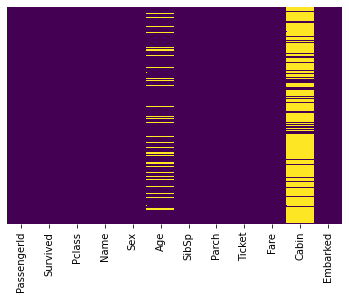

In [5]:
sns.heatmap(train.isnull(),cbar=False,yticklabels=False,cmap='viridis')

In [6]:
sns.set_style('whitegrid')

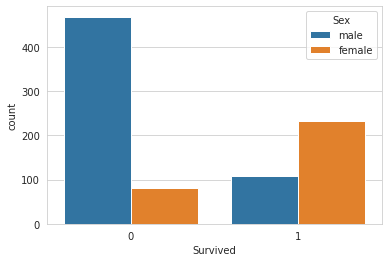

In [8]:
sns.countplot(x='Survived',data=train,hue='Sex')

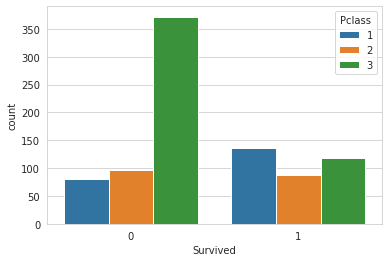

In [9]:
sns.countplot(x='Survived',data=train,hue='Pclass')

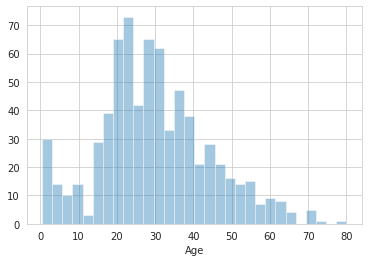

In [10]:
sns.distplot(train['Age'].dropna(),kde=False,bins=30)

Second way to get same plot using pandas

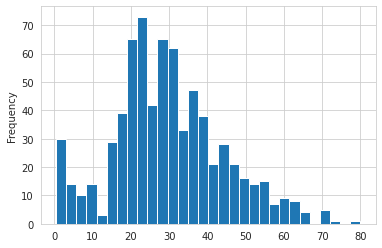

In [11]:
train['Age'].plot.hist(bins=30)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


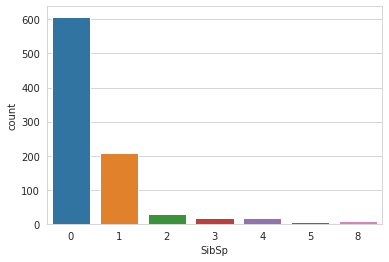

In [13]:
sns.countplot(x='SibSp',data=train)

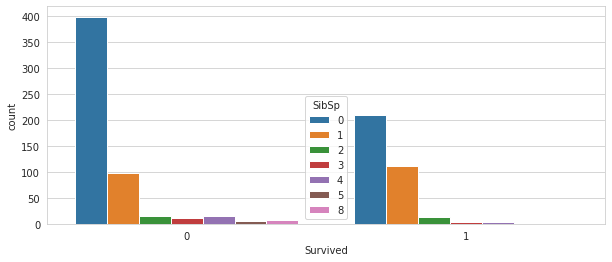

In [25]:
plt.figure(figsize=(10,4))
sns.countplot(x='Survived',data=train,hue='SibSp')

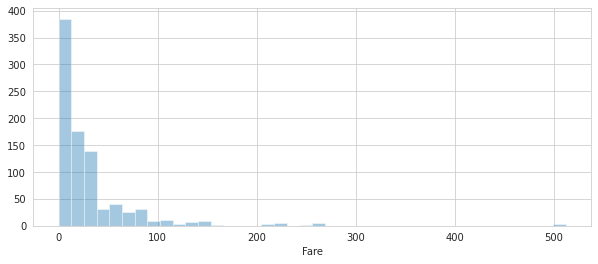

In [24]:
plt.figure(figsize=(10,4))
sns.distplot(train['Fare'].dropna(),kde=False,bins=40)

In [30]:
train['Fare'].iplot(kind='hist',bins=30)

In [31]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


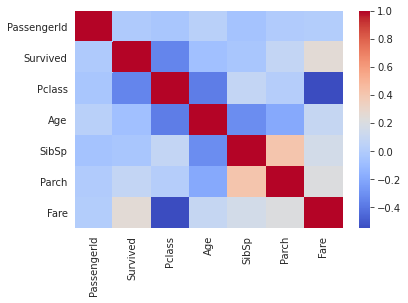

In [35]:
sns.heatmap(train.corr(),cmap='coolwarm')

## Dealing with missing data

Filling the age data

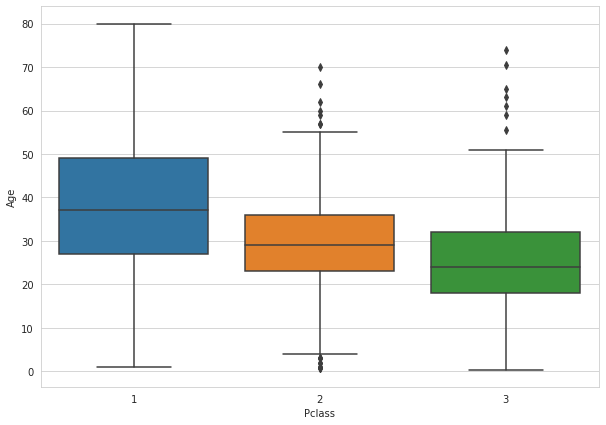

In [37]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train)

In [41]:
class_1 = train[train['Pclass'] == 1]
class_1['Age'].mean()

38.233440860215055

In [42]:
class_2 = train[train['Pclass'] == 2]
class_2['Age'].mean()

29.87763005780347

In [43]:
class_3 = train[train['Pclass'] == 3]
class_3['Age'].mean()

25.14061971830986

In [59]:
def impute_age(cols):
  Age = cols[0]
  Pclass = cols[1]

  if pd.isnull(Age):

    if Pclass == 1:
      return 38
    elif Pclass == 2:
      return 30
    else:
      return 25
  else:
    return Age

In [60]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

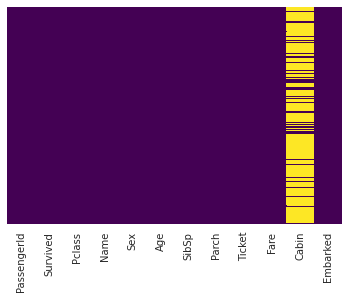

In [62]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [63]:
train.drop('Cabin',axis=1,inplace=True)

In [64]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,25,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,25,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,38,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,25,0,0,373450,8.0500,S


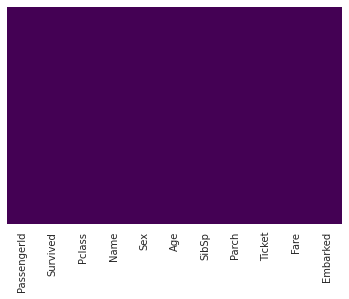

In [65]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [66]:
train.dropna(inplace=True)

## Getting dummy variable for categorical columns

In [68]:
pd.get_dummies(train['Sex'],drop_first=True)

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [69]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

Note that we are dropping 1 column to get rid of over constraint

In [71]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [72]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [73]:
train = pd.concat([train,sex,embark],axis=1)

In [74]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,25,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,25,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,38,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,25,0,0,373450,8.0500,S,1,0,1


In [75]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [76]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,25,1,0,7.2500,1,0,1
1,2,1,1,38,1,0,71.2833,0,0,0
2,3,1,3,25,0,0,7.9250,0,0,1
3,4,1,1,38,1,0,53.1000,0,0,1
4,5,0,3,25,0,0,8.0500,1,0,1


In [77]:
train.drop(['PassengerId'],axis=1,inplace=True)

In [78]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,25,1,0,7.2500,1,0,1
1,1,1,38,1,0,71.2833,0,0,0
2,1,3,25,0,0,7.9250,0,0,1
3,1,1,38,1,0,53.1000,0,0,1
4,0,3,25,0,0,8.0500,1,0,1


In [79]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Age       889 non-null    int64  
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
 6   male      889 non-null    uint8  
 7   Q         889 non-null    uint8  
 8   S         889 non-null    uint8  
dtypes: float64(1), int64(5), uint8(3)
memory usage: 51.2 KB


In [80]:
X = train.drop('Survived',axis=1)
y = train['Survived']

## Logistic Regression

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [83]:
from sklearn.linear_model import LogisticRegression

In [84]:
logmodel = LogisticRegression()

In [85]:
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [86]:
y_pred_train = logmodel.predict(X_train)

In [87]:
y_pred = logmodel.predict(X_test)

In [88]:
from sklearn.metrics import classification_report

In [89]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       163
           1       0.84      0.65      0.74       104

    accuracy                           0.82       267
   macro avg       0.82      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267



In [93]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       386
           1       0.75      0.68      0.71       236

    accuracy                           0.79       622
   macro avg       0.78      0.77      0.78       622
weighted avg       0.79      0.79      0.79       622



In [90]:
from sklearn.metrics import confusion_matrix

In [92]:
confusion_matrix(y_train,y_pred_train)

array([[332,  54],
       [ 75, 161]])

In [91]:
confusion_matrix(y_test,y_pred)

array([[150,  13],
       [ 36,  68]])